Spartial Filters    

[[1 1 1]
 [1 0 1]
 [1 1 1]]
[[  0.   4.   4. ...   0.   0.   0.]
 [  0.   4.   4. ...  -3.   0.   0.]
 [  0.   4.   4. ...  -9.  -2.   0.]
 ...
 [  0.   8.   9. ...  -7. -10.   0.]
 [  0.   9.  11. ...  -9.  -8.   0.]
 [  0.  10.  12. ... -10.  -8.   0.]]


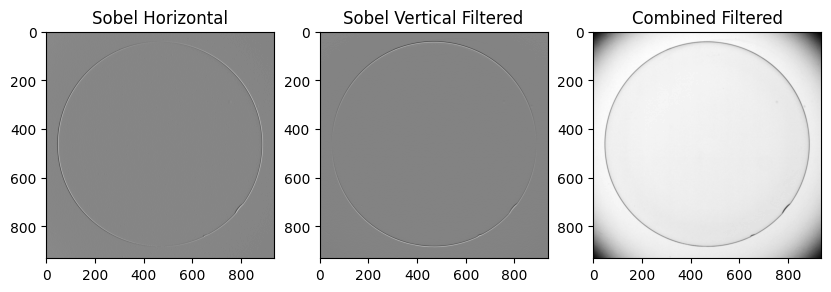

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('images/contact_lens.tif', cv.IMREAD_GRAYSCALE)
assert im is not None
sobel_h= np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
sobel_v = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], np.float32)

mod_h = cv.convertScaleAbs(sobel_h)
mod_v = cv.convertScaleAbs(sobel_v)
mod_c = cv.addWeighted(mod_h, 0.5, mod_v, 0.5, 0)
print(mod_c)

imh = cv.filter2D(im.astype('float'), -1, sobel_h)
imv = cv.filter2D(im.astype('float'), -1, sobel_v)
imc = cv.filter2D(im.astype('float'), -1, mod_c)

print(imh)
imh1 = cv.normalize(imh.astype('float'), None,0, 255.0, cv.NORM_MINMAX)
imv1 = cv.normalize(imv.astype('float'), None,0, 255.0, cv.NORM_MINMAX)
imc1 = cv.normalize(imc.astype('float'), None,0, 255.0, cv.NORM_MINMAX)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imh1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Sobel Horizontal')
ax[1].imshow(imv1, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Vertical Filtered')
ax[2].imshow(imc1, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Combined Filtered')
plt.show()

4


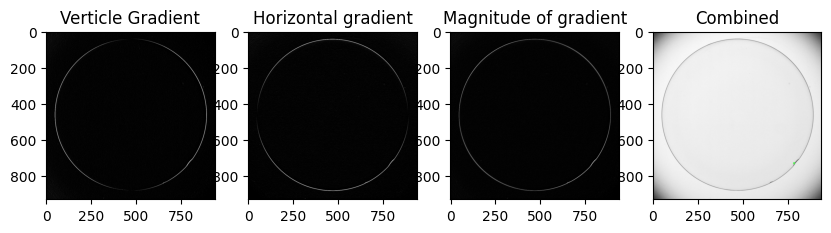

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image and convert it to grayscale
img = cv2.imread('images/contact_lens.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute the vertical gradient using the Sobel kernel
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
grad_y = cv2.filter2D(gray, -1, kernel_y)

# Compute the horizontal gradient using the Sobel kernel
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
grad_x = cv2.filter2D(gray, -1, kernel_x)

# Compute the gradient magnitude using the formula |fx|+|fy|1
grad_mag = cv2.addWeighted(np.abs(grad_x), 0.5, np.abs(grad_y), 0.5, 0)

# Apply Canny edge detection to extract the boundary of the contact lens
edges = cv2.Canny(grad_mag, 1000, 1000)

# Find the contours of the edge map
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Find the contour with the largest area, which should be the boundary of the contact lens
largest_contour = max(contours, key=cv2.contourArea)

# Fit a circle to the largest contour using the moments of the contour
M = cv2.moments(largest_contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])
radius = int(np.sqrt(M["m00"] / np.pi))

print(radius)
# Draw the circle on the original image
cir =cv2.circle(img, (cx, cy), radius, (0, 255, 0), 2)


fig, ax= plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(grad_y, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Verticle Gradient')
ax[1].imshow(grad_x, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Horizontal gradient')
ax[2].imshow(grad_mag, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Magnitude of gradient')
ax[3].imshow(cir, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Combined')
plt.show()




[[  0.  16.  16. ...   0.  -4.   0.]
 [  0.  16.  16. ...  -9.   4.   0.]
 [  0.  16.  16. ... -39. -10.   0.]
 ...
 [  0.  32.  35. ... -21. -42.   0.]
 [  0.  35.  45. ... -43. -28.   0.]
 [  0.  42.  48. ... -34. -36.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [ 16.  16.  16. ...   9.   0.   0.]
 [ 22.  26.  22. ...  29.   6.   0.]
 ...
 [-32. -32. -29. ...  -7.   0.  10.]
 [-32. -29. -19. ... -13. -16. -16.]
 [  0.   0.   0. ...   0.   0.   0.]]


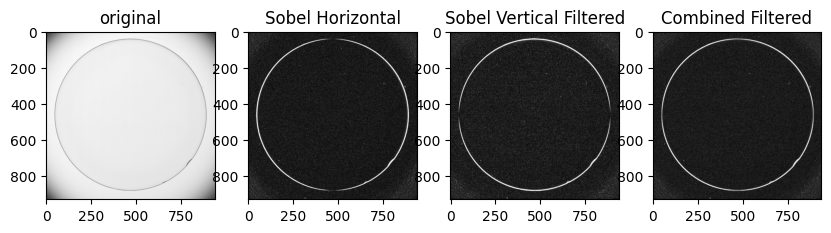

In [13]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('images/contact_lens.tif')
assert image is not None

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


ksize = -1 
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
print(gX)
print(gY)
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)
# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
# show our output images
fig, ax= plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('original')
ax[1].imshow(gX, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Horizontal')
ax[2].imshow(gY, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Vertical Filtered')
ax[3].imshow(combined, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Combined Filtered')
plt.show()



Question 2

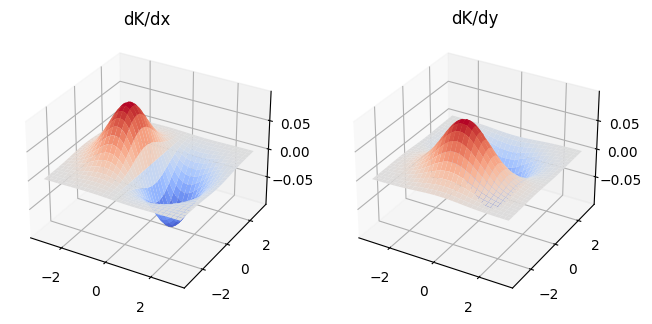

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#defining the variable regions
x, y = np.meshgrid(np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1))
z = np.zeros_like(x)

sigma = 1
#3D gaussian kernel
K = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(x**2 + y**2 + z**2) / (2.0 * sigma**2))

#derivatives of 3D gaussian kernel
dK_dx = (-x / sigma**2) * K
dK_dy = (-y / sigma**2) * K

# plot the kernels
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title("dK/dx")
ax1.plot_surface(x, y, dK_dx, cmap='coolwarm')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title("dK/dy")
ax2.plot_surface(x, y, dK_dy, cmap='coolwarm')

plt.show()


Question 3

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

im = cv.imread('images/zebrahead.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None
#defining the variable regions
x, y = np.meshgrid(np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1))
z = np.zeros_like(x)

sigma = 1
#3D gaussian kernel
K = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(x**2 + y**2 + z**2) / (2.0 * sigma**2))

#derivatives of 3D gaussian kernel
dK_dx = (-x / sigma**2) * K
dK_dy = (-y / sigma**2) * K

transform = cv.LUT(im, K)
cv.imshow('original', im)
cv.waitKey(0)
cv.imshow('Transform', transform)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


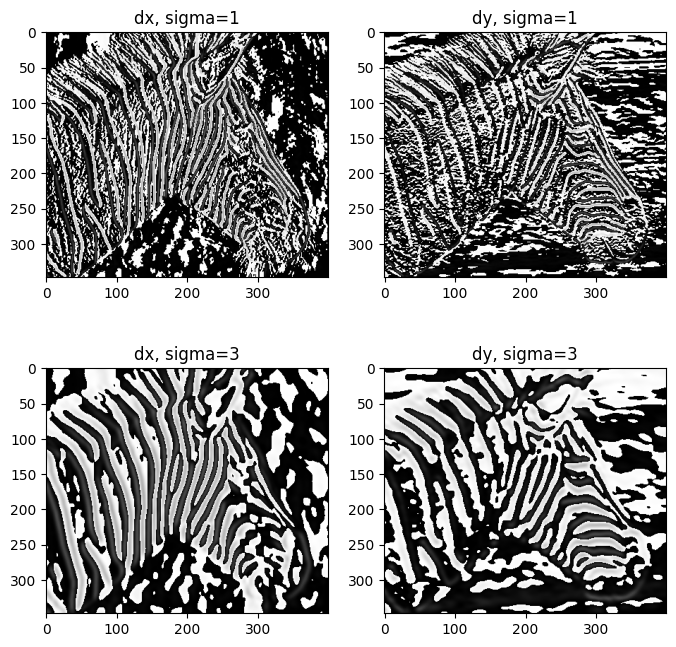

In [4]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the grayscale version of the zebrahead.jpg image
image = cv.imread('images/zebrahead.jpg', cv.IMREAD_GRAYSCALE)

# Define the Gaussian kernels for sigma = 1 and sigma = 3
sigma1 = 1
size1 = 2 * np.ceil(3 * sigma1) + 1
x, y = np.meshgrid(np.arange(-size1 / 2, size1 / 2 + 1), np.arange(-size1 / 2, size1 / 2 + 1))
kernel1 = (-x / sigma1**2) * np.exp(-(x**2 + y**2) / (2 * sigma1**2))
kernel1 /= np.sum(np.abs(kernel1))

sigma3 = 3
size3 = 2 * np.ceil(3 * sigma3) + 1
x, y = np.meshgrid(np.arange(-size3 / 2, size3 / 2 + 1), np.arange(-size3 / 2, size3 / 2 + 1))
kernel3 = (-x / sigma3**2) * np.exp(-(x**2 + y**2) / (2 * sigma3**2))
kernel3 /= np.sum(np.abs(kernel3))

# Convolve the image with the Gaussian kernels
image_dx1 = ndimage.convolve(image, kernel1, mode='nearest')
image_dy1 = ndimage.convolve(image, kernel1.T, mode='nearest')
image_dx3 = ndimage.convolve(image, kernel3, mode='nearest')
image_dy3 = ndimage.convolve(image, kernel3.T, mode='nearest')

# Display the resulting images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(image_dx1, cmap='gray')
axs[0, 0].set_title('dx, sigma=1')
axs[0, 1].imshow(image_dy1, cmap='gray')
axs[0, 1].set_title('dy, sigma=1')
axs[1, 0].imshow(image_dx3, cmap='gray')
axs[1, 0].set_title('dx, sigma=3')
axs[1, 1].imshow(image_dy3, cmap='gray')
axs[1, 1].set_title('dy, sigma=3')
plt.show()


Q4

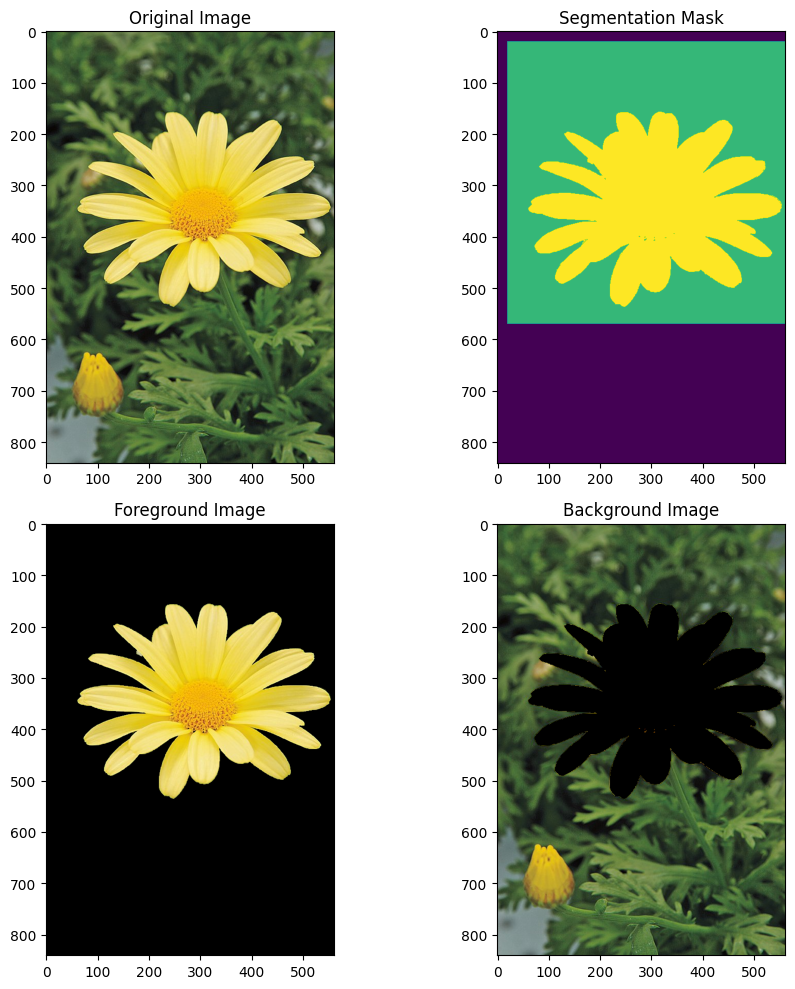

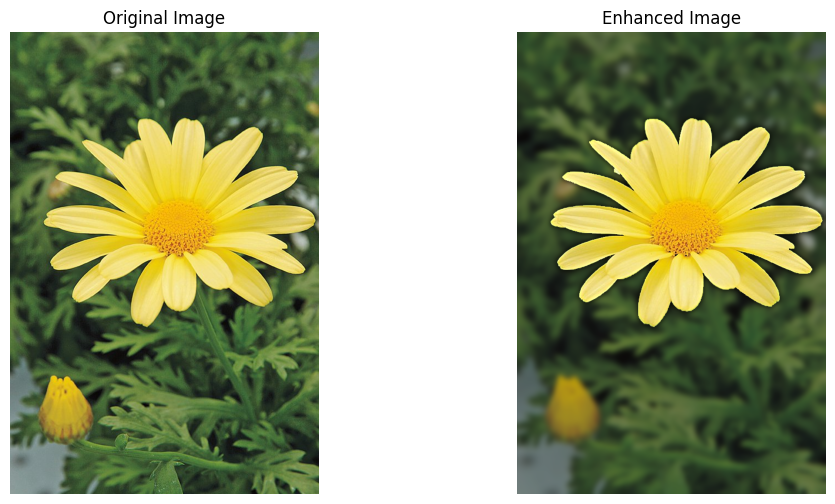

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images/daisy.jpg')

# Create a mask with same dimensions as image, and set everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

# Define the rectangle enclosing the flower
rect = (20, 20, 550, 550)

# Run the grabCut algorithm
cv2.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)

# Create a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv2.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

# Apply the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Show the final segmentation mask, foreground image, and background image
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img[:,:,::-1]), plt.title('Original Image')
plt.subplot(222), plt.imshow(mask), plt.title('Segmentation Mask')
plt.subplot(223), plt.imshow(foreground[:,:,::-1]), plt.title('Foreground Image')
plt.subplot(224), plt.imshow(background[:,:,::-1]), plt.title('Background Image')
plt.tight_layout()
plt.show()

# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)

# Combine the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Display the original image and the enhanced image side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


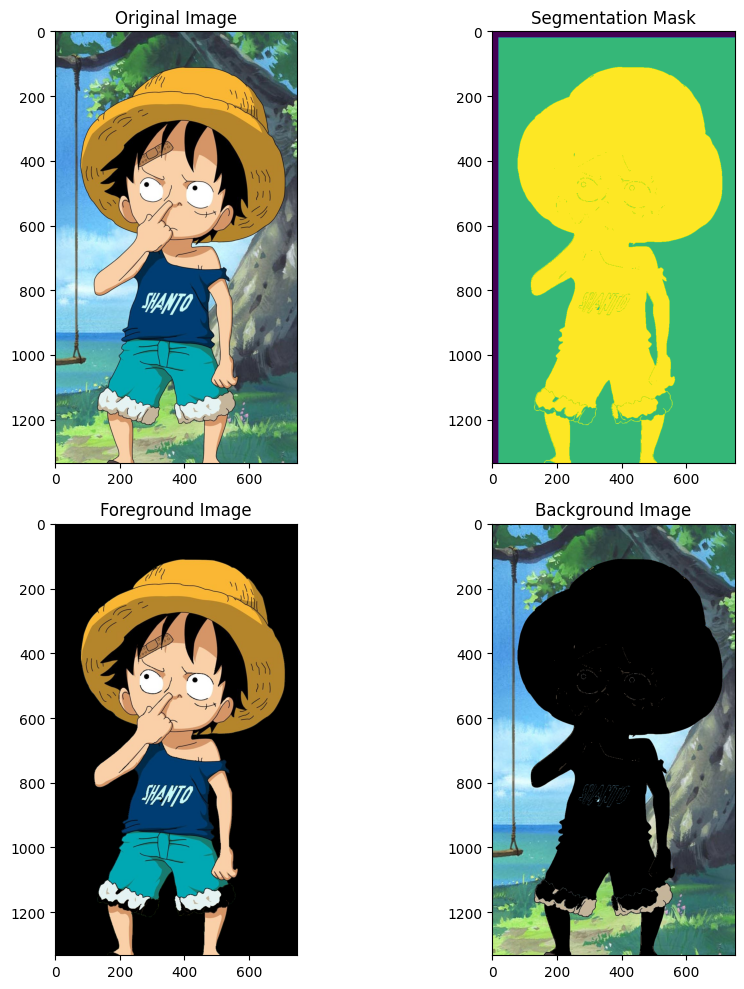

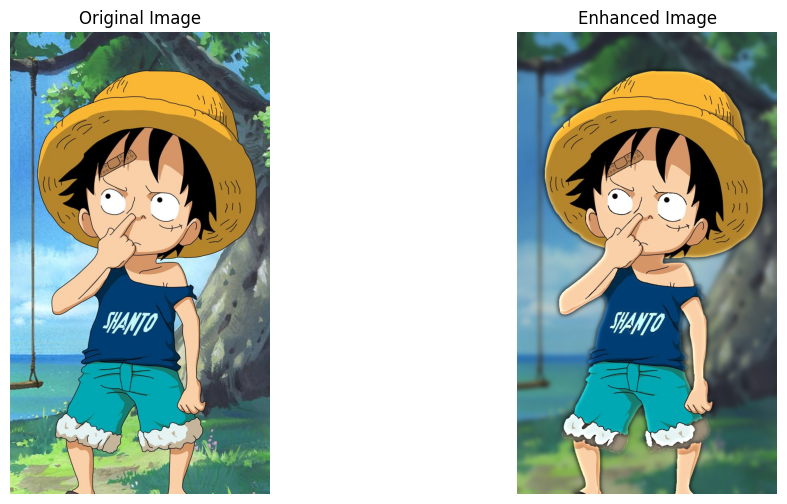

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images/luffy.jpg')

# Create a mask with same dimensions as image, and set everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

# Define the rectangle enclosing the flower
rect = (20, 20, 800, 1400)

# Run the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 6, cv.GC_INIT_WITH_RECT)

# Create a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

# Apply the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Show the final segmentation mask, foreground image, and background image
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img[:,:,::-1]), plt.title('Original Image')
plt.subplot(222), plt.imshow(mask), plt.title('Segmentation Mask')
plt.subplot(223), plt.imshow(foreground[:,:,::-1]), plt.title('Foreground Image')
plt.subplot(224), plt.imshow(background[:,:,::-1]), plt.title('Background Image')
plt.tight_layout()
plt.show()

# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (41, 41), 0)

# Combine the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Display the original image and the enhanced image side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()